In [120]:
import pandas as pd
import numpy as np

file_path = 'Book1.xlsx - Sheet2.csv'
file_path1 = 'data/Book1.xlsx - Sheet2 (1).csv'

# Read the CSV file
df = pd.read_csv(file_path, header=1)
data_train = pd.read_csv(file_path1, header=1)

# Display the first few rows of the dataset
df.head()

df = df.drop(columns=['Treatment condition', 'Chemical used', 'Hypothesis for cause of cell death'])

# Define the conditions
conditions = [
    (df['Concentration/Ferric citrate'] == 0) & (df['Concentration/Aß 1-42'] == 0),
    (df['Concentration/Ferric citrate'] != 0) & (df['Concentration/Aß 1-42'] == 0),
    (df['Concentration/Ferric citrate'] == 0) & (df['Concentration/Aß 1-42'] != 0),
    (df['Concentration/Ferric citrate'] != 0) & (df['Concentration/Aß 1-42'] != 0)
]

conditions1 = [
    (data_train['Concentration/Ferric citrate'] == 0) & (data_train['Concentration/Aß 1-42'] == 0),
    (data_train['Concentration/Ferric citrate'] != 0) & (data_train['Concentration/Aß 1-42'] == 0),
    (data_train['Concentration/Ferric citrate'] == 0) & (data_train['Concentration/Aß 1-42'] != 0),
    (data_train['Concentration/Ferric citrate'] != 0) & (data_train['Concentration/Aß 1-42'] != 0)
]

# Define the values to assign for each condition
values = [0, 1, 2, 3]

# Apply conditions and assign values
df['treatment'] = np.select(conditions, values)

data_train['treatment'] = np.select(conditions1, values)
data_train['%ldh'] = data_train.groupby('treatment')['%ldh'].transform(lambda x: x.fillna(x.mean()))
data_train['cells dead'] = data_train.groupby('treatment')['cells dead'].transform(lambda x: x.fillna(x.mean()))
data_train['cells alive'] = data_train.groupby('treatment')['cells alive'].transform(lambda x: x.fillna(x.mean()))
data_train['Total Cells'] = data_train['cells alive'] + data_train['cells dead']
data_train['% cells alive'] = (data_train['cells alive'] / data_train['Total Cells']) * 100
data_train['% cells dead'] = (data_train['cells dead'] / data_train['Total Cells']) * 100
data_train['%Neuron alive'] = (data_train['Neurons alive'] / data_train['cells alive']) * 100

data_train


,Treatment condition,Chemical used,Concentration/Ferric citrate,Concentration/Aß 1-42,cells alive,cells dead,Total Cells,mechanical trauma,ROS,dysregulation of fe protiens,Aß fibrils,Hypothesis for cause of cell death,%ldh,Neurons alive,Glial alive,treatment,% cells alive,% cells dead,%Neuron alive
0,Untretaed control,Nothing,0,0,568.00,645.00,1213.00,1,0,0,0,Mechanical trauma,7.160000,156,449,0,46.826051,53.173949,27.464789
1,Iron treated,Ferric citrate,85,0,252.00,952.00,1204.00,0,1,1,0,"ROS, dysregulation of iron homeostatic protiens",31.030000,41,525,1,20.930233,79.069767,16.269841
2,Aβ treated,Aβ 1-42,0,35,594.00,775.00,1369.00,0,0,0,1,Presence of Aβ fibrils,22.760000,151,456,2,43.389335,56.610665,25.420875
3,Iron + Aβ treated,Ferric citrate + Aβ 1-42,85,35,328.00,1264.00,1592.00,0,1,1,1,Dense Aβ fibril aggregation + ROS + dysregulat...,39.040000,48,440,3,20.603015,79.396985,14.634146
4,Untretaed control,Nothing,0,0,848.00,223.00,1071.00,1,0,0,0,Mechanical trauma,7.210000,89,563,0,79.178338,20.821662,10.495283
5,Iron treated,Ferric citrate,85,0,186.00,1167.00,1353.00,0,1,1,0,"ROS, dysregulation of iron homeostatic protiens",20.510000,67,420,1,13.747228,86.252772,36.021505
6,Aβ treated,Aβ 1-42,0,35,594.00,775.00,1369.00,0,0,0,1,Presence of Aβ fibrils,30.740000,65,774,2,43.389335,56.610665,10.942761
7,Iron + Aβ treated,Ferric citrate + Aβ 1-42,85,35,358.00,1282.00,1640.00,0,1,1,1,Dense Aβ fibril aggregation + ROS + dysregulat...,41.540000,31,429,3,21.829268,78.170732,8.659218
8,Untretaed control,Nothing,0,0,322.00,357.00,679.00,1,0,0,0,Mechanical trauma,13.950000,98,363,0,47.422680,52.577320,30.434783
9,Iron treated,Ferric citrate,85,0,104.00,733.00,837.00,0,1,1,0,"ROS, dysregulation of iron homeostatic protiens",25.210000,84,429,1,12.425329,87.574671,80.769231


   Concentration/Ferric citrate  Concentration/Aß 1-42  cells alive  \
0                             0                      0          568   
4                             0                      0          848   
8                             0                      0          322   

   cells dead  Total Cells  mechanical trauma  ROS  \
0         645         1213                  1    0   
4         223         1071                  1    0   
8         357          679                  1    0   

   dysregulation of fe protiens  Aß fibrils   %ldh  Neurons alive  \
0                             0           0   7.16            156   
4                             0           0   7.21             89   
8                             0           0  13.95             98   

   Glial alive  treatment  
0          449          0  
4          563          0  
8          363          0  


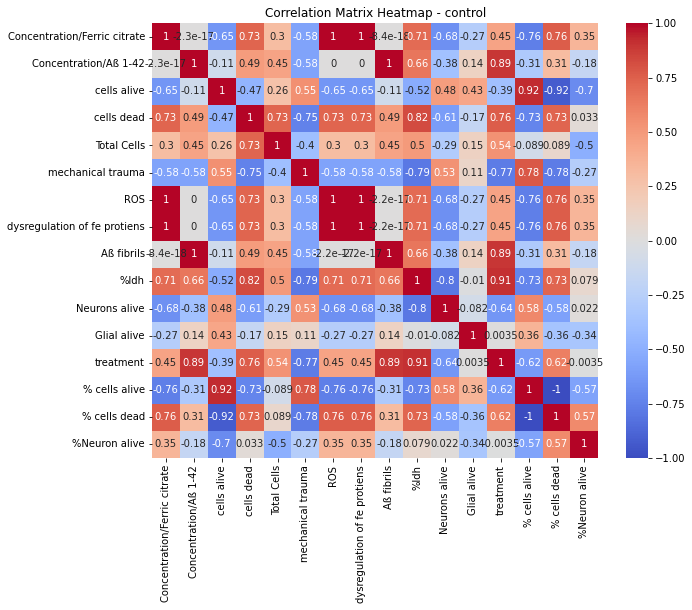

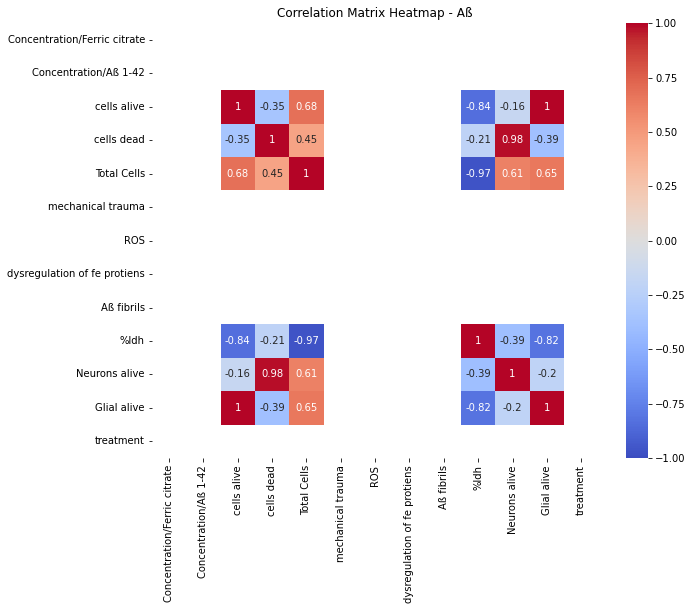

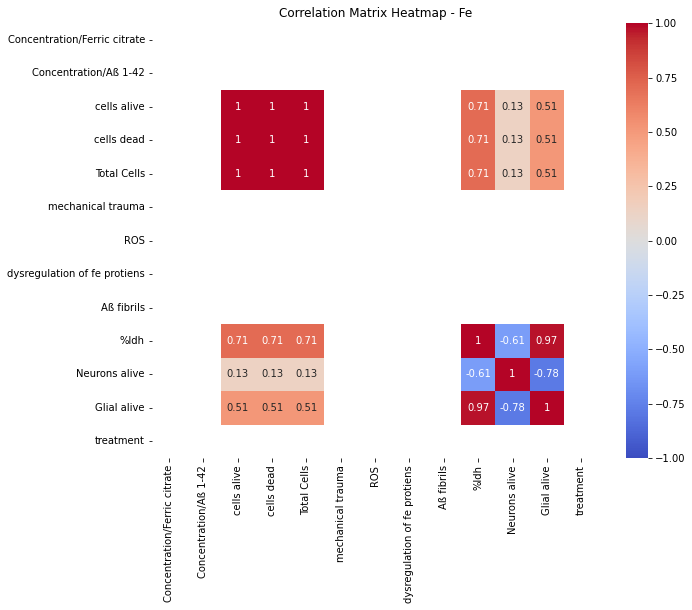

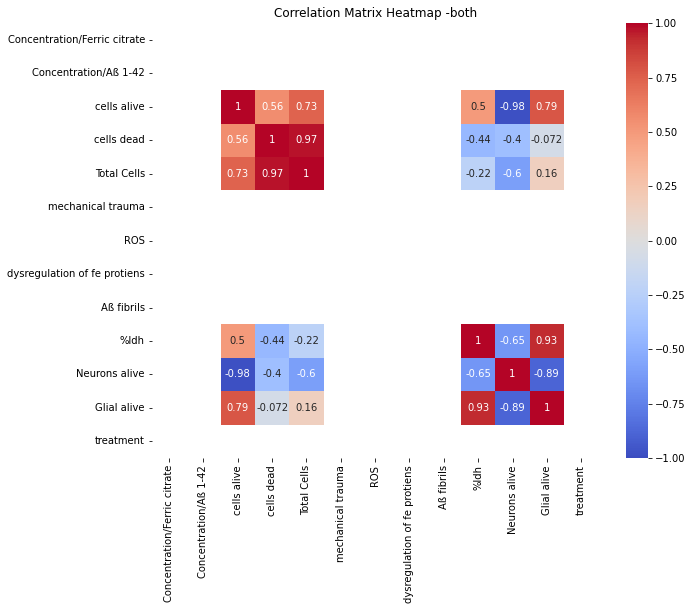

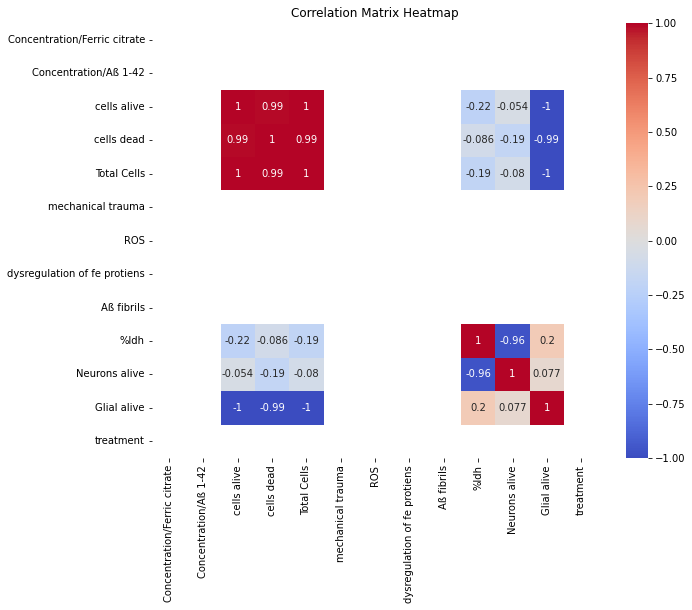

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_control = df[(df['Concentration/Ferric citrate'] == 0) & (df['Concentration/Aß 1-42'] == 0)]
df_Aß = df[(df['Concentration/Ferric citrate'] == 0) & (df['Concentration/Aß 1-42'] != 0)]
df_fe = df[(df['Concentration/Ferric citrate'] != 0) & (df['Concentration/Aß 1-42'] == 0)]
df_both = df[(df['Concentration/Ferric citrate'] != 0) & (df['Concentration/Aß 1-42'] != 0)]
print(df_control)
# Calculate correlation matrix
corr_matrix = data_train.corr(method='pearson')
corr_matrix1 = df_control.corr()
corr_matrix2 = df_Aß.corr()
corr_matrix3 = df_fe.corr()
corr_matrix4 = df_both.corr()



# Plot the heatmap for correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the size as per your requirement
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap - control')
plt.show()

plt.figure(figsize=(10, 8))  # Adjust the size as per your requirement
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap - Aß')
plt.show()

plt.figure(figsize=(10, 8))  # Adjust the size as per your requirement
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap - Fe')
plt.show()

plt.figure(figsize=(10, 8))  # Adjust the size as per your requirement
sns.heatmap(corr_matrix3, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap -both')
plt.show()

plt.figure(figsize=(10, 8))  # Adjust the size as per your requirement
sns.heatmap(corr_matrix4, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()



In [122]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
import itertools
import random
import statsmodels.api as sm

# Prepare data
X = df[['Concentration/Ferric citrate', 'Concentration/Aß 1-42']]
y = df['%ldh']

# Train Linear model
model = LinearRegression() # default objective for regression
model.fit(X, y)

classifier = LogisticRegression


# All possible combinations for 'Concentration/Ferric citrate' values 0-100 
# and 'Concentration/Aß 1-42' values 0-60
ferric_citrate_values = range(40, 120)  # 0 to 100
aß_values = range(15, 65)  # 0 to 60

all_combinations = list(itertools.product(ferric_citrate_values, aß_values))
samples = len(all_combinations) // 44
all_combinations = random.sample(all_combinations, samples)

# Some more data with 'Concentration/Ferric citrate' values 0-100 
# and 'Concentration/Aß 1-42' as constant 35
#constant_aß_35 = list(itertools.product(ferric_citrate_values, [35]))
#samples_aß_35 = len(constant_aß_35) // 3
#constant_aß_35 = random.sample(constant_aß_35, samples_aß_35)

# Some more data with 'Concentration/Ferric citrate' values 0-100 
constant_aß_0 = list(itertools.product(ferric_citrate_values, [0]))
samples_aß_0 = len(constant_aß_0) // 3
constant_aß_0 = random.sample(constant_aß_0, samples_aß_0)


# 'Concentration/Ferric citrate' as constant 85 
# and 'Concentration/Aß 1-42' as constant values 0-60
#constant_ferric_85 = list(itertools.product([85], aß_values))
#samples_ferric_85 = len(constant_ferric_85)
#constant_ferric_85 = random.sample(constant_ferric_85, samples_ferric_85)


#'Concentration/Aß 1-42' as values 0-60
constant_ferric_0 = list(itertools.product([0], aß_values))
samples_ferric_0 = len(constant_ferric_0)
constant_ferric_0 = random.sample(constant_ferric_0, samples_ferric_0)

# Combine all the combinations
final_combinations = all_combinations + constant_aß_0 + constant_ferric_0
final_combinations = [list(comb) for comb in final_combinations]

#Make prediction
predictions= model.predict(pd.DataFrame(final_combinations))

# prediction for dead cells
X_dead = df[['Concentration/Ferric citrate', 'Concentration/Aß 1-42',  'Total Cells', '%ldh', 'mechanical trauma', 'ROS', 'dysregulation of fe protiens', 'Aß fibrils']]
y_dead = df['cells dead']
model.fit(X_dead, y_dead)
df_dead = df['cells dead'][:12].tolist()


# Create a new DataFrame with the predicted values
new_data = pd.DataFrame({
    'Concentration/Ferric citrate': [comb[0] for comb in final_combinations],
    'Concentration/Aß 1-42': [comb[1] for comb in final_combinations],
    'cells alive': [int(p*10) for p in predictions],   # just an example transformation
    'cells dead': [int(p*15) for p in predictions],
    'Total Cells': [random.randint(950, 1200) for p in predictions],
    'mechanical trauma': [1 if comb[0] == 0 & comb[0] == 1 else 0 for comb in final_combinations], 
    'ROS': [1 if comb[0] != 0  else 0 for comb in final_combinations],  # dummy condition
    'dysregulation of fe protiens': [1 if comb[0] != 0  else 0 for comb in final_combinations], # dummy condition
    'Aß fibrils': [1 if comb[1] != 0  else 0 for comb in final_combinations], # dummy condition
    '%ldh': predictions,
    'Neurons alive': [int(p*5) for p in predictions],  # just an example transformation
    'Glial alive': [int(p*7) for p in predictions],  # just an example transformation
})

# Append new data to the original dataframe
df = df.append(new_data, ignore_index=True)

# Define the conditions
conditions = [
    (df['Concentration/Ferric citrate'] == 0) & (df['Concentration/Aß 1-42'] == 0),
    (df['Concentration/Ferric citrate'] != 0) & (df['Concentration/Aß 1-42'] == 0),
    (df['Concentration/Ferric citrate'] == 0) & (df['Concentration/Aß 1-42'] != 0),
    (df['Concentration/Ferric citrate'] != 0) & (df['Concentration/Aß 1-42'] != 0)
]

# Define the values to assign for each condition
values = [0, 1, 2, 3]

# Apply conditions and assign values
df['treatment'] = np.select(conditions, values)

#predict no of cells dead
pred_dead= model.predict(df[['Concentration/Ferric citrate', 'Concentration/Aß 1-42',  'Total Cells', '%ldh', 'mechanical trauma', 'ROS', 'dysregulation of fe protiens', 'Aß fibrils']])
pred_dead = np.clip(pred_dead, 0, df['Total Cells'].values)
pred_dead = pred_dead[12:].tolist()
combined_dead = df_dead + pred_dead

df['cells dead'] = combined_dead
df['cells alive'] = df['Total Cells'] - df ['cells dead']

df


c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\grzrah03\AppData\Local\Temp\ipykernel_452048\3977718724.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_data, ignore_index=True)


,Concentration/Ferric citrate,Concentration/Aß 1-42,cells alive,cells dead,Total Cells,mechanical trauma,ROS,dysregulation of fe protiens,Aß fibrils,%ldh,Neurons alive,Glial alive,treatment
0,0,0,568.000000,645.000000,1213,1,0,0,0,7.160000,156,449,0
1,85,0,252.000000,952.000000,1204,0,1,1,0,31.030000,41,525,1
2,0,35,594.000000,775.000000,1369,0,0,0,1,22.760000,151,456,2
3,85,35,328.000000,1264.000000,1592,0,1,1,1,39.040000,48,440,3
4,0,0,848.000000,223.000000,1071,1,0,0,0,7.210000,89,563,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0,26,490.502813,709.497187,1200,0,0,0,1,20.583452,102,144,2
174,0,53,223.637537,752.362463,976,0,0,0,1,32.135595,160,224,2
175,0,50,226.357927,731.642073,958,0,0,0,1,30.852024,154,215,2
176,0,36,388.500905,723.499095,1112,0,0,0,1,24.862024,124,174,2


In [123]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
import itertools
import random
import statsmodels.api as sm

model = LinearRegression()

# prediction for Neuron
X_Neurons = data_train[['treatment', '%ldh', 'cells alive', 'cells dead']][:20]
y_Neurons = data_train['Neurons alive'][:20].tolist()
#model_rlm = sm.RLM(y_Neurons, X_Neurons).fit()
model.fit(X_Neurons, y_Neurons)
df_Neurons = df['Neurons alive'][:20].tolist()

#predict no of Neurons
pred_Neurons= model.predict(df[['treatment', '%ldh', 'cells alive', 'cells dead']])
pred_Neurons = np.clip(pred_Neurons, 0, None)
pred_Neurons = pred_Neurons[20:].tolist()
combined_Neurons = df_Neurons + pred_Neurons

df['Neurons alive'] = combined_Neurons

# prediction for Glial
X_Glial = df[['cells alive', 'cells dead', 'Concentration/Ferric citrate', 'Concentration/Aß 1-42',  'Total Cells', '%ldh', 'mechanical trauma']][:12]
y_Glial = df['Glial alive'][:12].tolist()
#model_rlm = sm.RLM(y_Glial, X_Glial).fit()
model.fit(X_Glial, y_Glial)
df_Glial = df['Glial alive'][:12].tolist()

#predict no of Glial
pred_Glial= model.predict(df[['cells alive', 'cells dead', 'Concentration/Ferric citrate', 'Concentration/Aß 1-42',  'Total Cells', '%ldh', 'mechanical trauma']])
pred_Glial = pred_Glial[12:].tolist()
combined_Glial = df_Glial + pred_Glial

df['Glial alive'] = combined_Glial

# Drop rows where 'neurons' is greater than 150
df = df[df['Neurons alive'] <= 150]
df = df[df['cells dead'] <= 1200]
    
df

,Concentration/Ferric citrate,Concentration/Aß 1-42,cells alive,cells dead,Total Cells,mechanical trauma,ROS,dysregulation of fe protiens,Aß fibrils,%ldh,Neurons alive,Glial alive,treatment
1,85,0,252.000000,952.000000,1204,0,1,1,0,31.030000,41.000000,525.000000,1
4,0,0,848.000000,223.000000,1071,1,0,0,0,7.210000,89.000000,563.000000,0
5,85,0,186.000000,1167.000000,1353,0,1,1,0,20.510000,67.000000,420.000000,1
6,0,35,594.000000,775.000000,1369,0,0,0,1,30.740000,65.000000,774.000000,2
8,0,0,322.000000,357.000000,679,1,0,0,0,13.950000,98.000000,363.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0,26,490.502813,709.497187,1200,0,0,0,1,20.583452,110.664330,570.446115,2
174,0,53,223.637537,752.362463,976,0,0,0,1,32.135595,58.124870,497.706758,2
175,0,50,226.357927,731.642073,958,0,0,0,1,30.852024,63.418628,499.239780,2
176,0,36,388.500905,723.499095,1112,0,0,0,1,24.862024,91.141386,542.736457,2


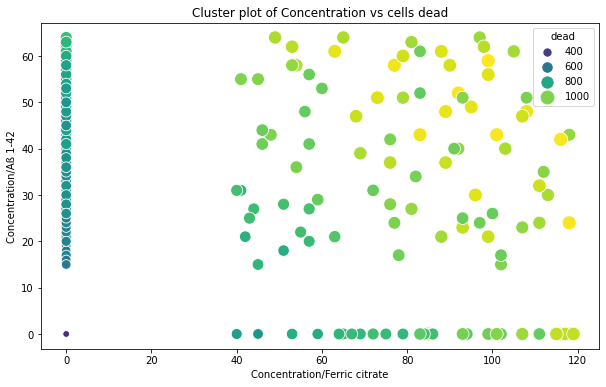

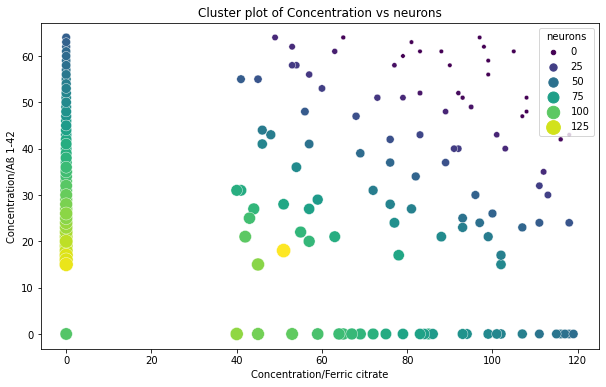

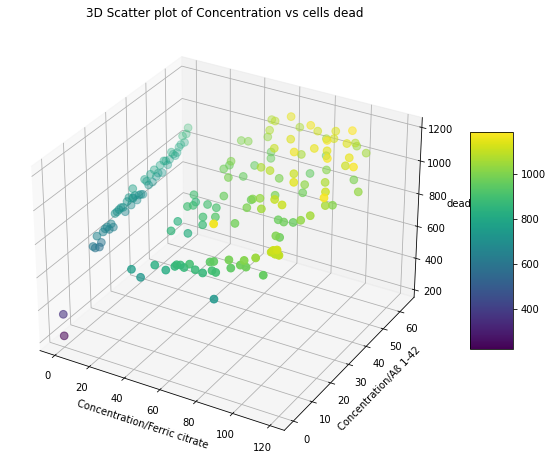

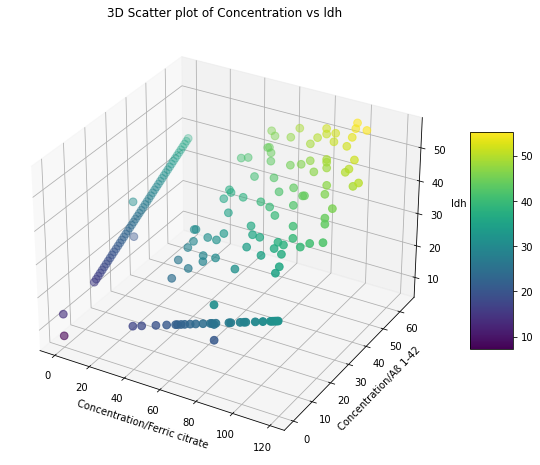

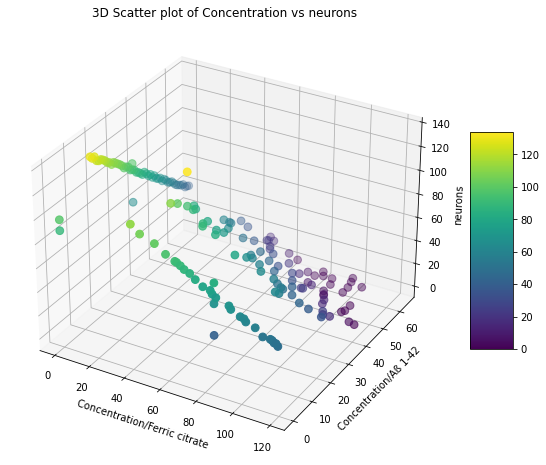

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Sample data
data = {
    'Concentration/Ferric citrate': df['Concentration/Ferric citrate'],
    'Concentration/Aß 1-42': df['Concentration/Aß 1-42'],
    'dead': df['cells dead'],  
    'ldh' : df['%ldh'],
    'neurons': df['Neurons alive']
}

df_plot = pd.DataFrame(data)


# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_plot, x='Concentration/Ferric citrate', y='Concentration/Aß 1-42', hue='dead', size='dead', sizes=(20, 200), palette="viridis")

plt.title('Cluster plot of Concentration vs cells dead')
plt.show()

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_plot, x='Concentration/Ferric citrate', y='Concentration/Aß 1-42', hue='neurons', size='neurons', sizes=(20, 200), palette="viridis")

plt.title('Cluster plot of Concentration vs neurons')
plt.show()

# Scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sctt = ax.scatter3D(df_plot['Concentration/Ferric citrate'], 
                    df_plot['Concentration/Aß 1-42'], 
                    df_plot['dead'], 
                    c=df_plot['dead'], 
                    s=60, 
                    cmap='viridis')

# Title and labels
ax.set_title('3D Scatter plot of Concentration vs cells dead')
ax.set_xlabel('Concentration/Ferric citrate')
ax.set_ylabel('Concentration/Aß 1-42')
ax.set_zlabel('dead')
fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=5)

plt.show()

# Scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sctt = ax.scatter3D(df_plot['Concentration/Ferric citrate'], 
                    df_plot['Concentration/Aß 1-42'], 
                    df_plot['ldh'], 
                    c=df_plot['ldh'], 
                    s=60, 
                    cmap='viridis')

# Title and labels
ax.set_title('3D Scatter plot of Concentration vs ldh')
ax.set_xlabel('Concentration/Ferric citrate')
ax.set_ylabel('Concentration/Aß 1-42')
ax.set_zlabel('ldh')
fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=5)

plt.show()

# Scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sctt = ax.scatter3D(df_plot['Concentration/Ferric citrate'], 
                    df_plot['Concentration/Aß 1-42'], 
                    df_plot['neurons'], 
                    c=df_plot['neurons'], 
                    s=60, 
                    cmap='viridis')

# Title and labels
ax.set_title('3D Scatter plot of Concentration vs neurons')
ax.set_xlabel('Concentration/Ferric citrate')
ax.set_ylabel('Concentration/Aß 1-42')
ax.set_zlabel('neurons')
fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=5)

plt.show()

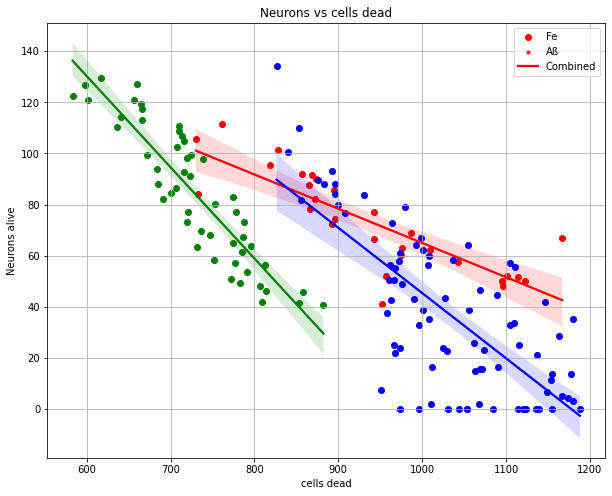

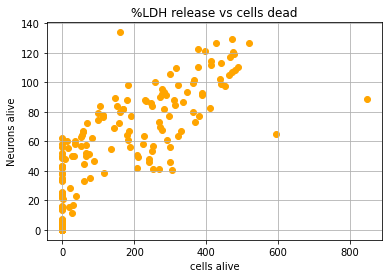

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df_control = df[(df['Concentration/Ferric citrate'] == 0) & (df['Concentration/Aß 1-42'] == 0)]
df_fe = df[(df['Concentration/Ferric citrate'] != 0) & (df['Concentration/Aß 1-42'] == 0)]
df_aß = df[(df['Concentration/Ferric citrate'] == 0) & (df['Concentration/Aß 1-42'] != 0)]
df_both = df[(df['Concentration/Ferric citrate'] != 0) & (df['Concentration/Aß 1-42'] != 0)]

plt.figure(figsize=(10, 8))
#plt.scatter(df_control['cells dead'], df_control['Neurons alive'], color='orange')
plt.scatter(df_fe['cells dead'], df_fe['Neurons alive'], color='red')
sns.regplot(x=df_fe['cells dead'], y=df_fe['Neurons alive'], color='red', scatter_kws={'s':10}, label='Fe')
plt.scatter(df_aß['cells dead'], df_aß['Neurons alive'], color='green')
sns.regplot(x=df_aß['cells dead'], y=df_aß['Neurons alive'], color='green', scatter_kws={'s':10}, label='Aß')
plt.scatter(df_both['cells dead'], df_both['Neurons alive'], color='blue')
sns.regplot(x=df_both['cells dead'], y=df_both['Neurons alive'], color='blue', scatter_kws={'s':10}, label='Combined')

plt.xlabel('cells dead')
plt.ylabel('Neurons alive')
plt.title('Neurons vs cells dead')
plt.grid(True)
plt.legend(['Fe', 'Aß', 'Combined'])
plt.show()

plt.scatter(df['cells alive'], df['Neurons alive'], color='orange')
plt.xlabel('cells alive')
plt.ylabel('Neurons alive')
plt.title('%LDH release vs cells dead')
plt.grid(True)
plt.show()

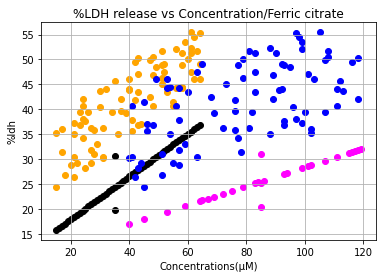

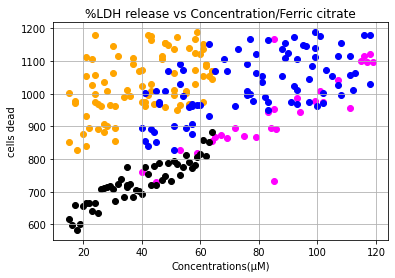

In [126]:
df_fe = df[(df['Concentration/Ferric citrate'] != 0) & (df['Concentration/Aß 1-42'] == 0)]
df_aß = df[(df['Concentration/Ferric citrate'] == 0) & (df['Concentration/Aß 1-42'] != 0)]
df_both = df[(df['Concentration/Ferric citrate'] != 0) & (df['Concentration/Aß 1-42'] != 0)]
df_aß_35 = df[(df['Concentration/Ferric citrate'] != 0) & (df['Concentration/Aß 1-42'] == 35)]
df_fe_85 = df[(df['Concentration/Ferric citrate'] == 85) & (df['Concentration/Aß 1-42'] != 0)]


plt.scatter(df_fe['Concentration/Ferric citrate'], df_fe['%ldh'], color='magenta')
plt.scatter(df_aß['Concentration/Aß 1-42'], df_aß['%ldh'], color='black')
plt.scatter(df_both['Concentration/Aß 1-42'], df_both['%ldh'], color='orange')
plt.scatter(df_both['Concentration/Ferric citrate'], df_both['%ldh'], color='blue')
#plt.scatter(df_both['Concentration/Aß 1-42'], df_both['%ldh'], color='orange')
#plt.scatter(df_both['Concentration/Ferric citrate'], df_both['%ldh'], color='blue')
plt.xlabel('Concentrations(µM)')
plt.ylabel('%ldh')
plt.title('%LDH release vs Concentration/Ferric citrate')
plt.grid(True)
#plt.legend(['Fe', 'Aß', 'Combined with x-axis = conc. of Aß', 'Combined with x-axis = conc. of Fe'])
plt.show()

plt.scatter(df_fe['Concentration/Ferric citrate'], df_fe['cells dead'], color='magenta')
plt.scatter(df_aß['Concentration/Aß 1-42'], df_aß['cells dead'], color='black')
plt.scatter(df_both['Concentration/Aß 1-42'], df_both['cells dead'], color='orange')
plt.scatter(df_both['Concentration/Ferric citrate'], df_both['cells dead'], color='blue')
#plt.scatter(df_both['Concentration/Aß 1-42'], df_both['%ldh'], color='orange')
#plt.scatter(df_both['Concentration/Ferric citrate'], df_both['%ldh'], color='blue')
plt.xlabel('Concentrations(µM)')
plt.ylabel('cells dead')
plt.title('%LDH release vs Concentration/Ferric citrate')
plt.grid(True)
#plt.legend(['Fe', 'Aß', 'Combined with x-axis = conc. of Aß', 'Combined with x-axis = conc. of Fe'])
plt.show()